In [1]:
import dateutil.parser as parser
import os
import pytz
import xarray as xr

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-white')

from ooi_data_explorations.common import get_deployment_dates, m2m_request, m2m_collect
from ooi_data_explorations.uncabled.process_pco2w import pco2w_datalogger, pco2w_instrument

import warnings
warnings.filterwarnings('ignore')

In [2]:
site = 'CE01ISSM'           # OOI Net site designator
node = 'RID16'              # OOI Net node designator
sensor = '05-PCO2WB000'     # OOI Net sensor designator
streams = ['pco2w_abc_dcl_instrument', 'pco2w_abc_dcl_instrument_recovered', 'pco2w_abc_instrument']
methods = ['telemetered', 'recovered_host', 'recovered_inst']
deploy = 11
start, stop = get_deployment_dates(site, node, sensor, deploy)

# create a simple function to request the data based on the different streams and methods
def request_data(site, node, sensor, method, stream, deploy, start, stop):
    r = m2m_request(site, node, sensor, method, stream, start, stop)
    data = m2m_collect(r, '^(?!.*blank).*deployment0011.*PCO2W.*nc$')
    return data

data = [request_data(site, node, sensor, methods[i], streams[i], deploy, start, stop) for i in range(3)]

Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: telemetered
	stream: pco2w_abc_dcl_instrument
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 400/400 [01:00<00:00,  6.65it/s]


Merging the data files into a single dataset
Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: recovered_host
	stream: pco2w_abc_dcl_instrument_recovered
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 400/400 [00:30<00:00, 13.31it/s]


Merging the data files into a single dataset
Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: recovered_inst
	stream: pco2w_abc_instrument
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 400/400 [00:30<00:00, 13.31it/s]


Merging the data files into a single dataset


In [3]:
telem = pco2w_datalogger(data[0])
telem

<xarray.Dataset> Size: 304kB
Dimensions:                             (time: 2222, duplicates: 2)
Coordinates:
  * time                                (time) datetime64[ns] 18kB 2019-04-20...
  * duplicates                          (duplicates) int32 8B 0 1
Data variables: (12/26)
    thermistor_temperature_qc_executed  (time) uint8 2kB 1 1 1 1 1 ... 1 1 1 1 1
    pco2_seawater_qartod_results        (time) uint8 2kB 4 4 4 1 1 ... 1 1 1 1 1
    pco2_seawater_qc_executed           (time) uint8 2kB 29 29 29 ... 29 29 29
    absorbance_blank_620                (time) int32 9kB 20591 20591 ... 17719
    absorbance_ratio_434                (time) int32 9kB 1113 1149 ... 2610 2524
    absorbance_ratio_620                (time) int32 9kB 19638 18777 ... 8826
    ...                                  ...
    reference_434                       (time, duplicates) int32 18kB 2941 .....
    signal_434                          (time, duplicates) int32 18kB 282 ......
    reference_620                       (time, duplicates) int32 18kB 2099 .....
    signal_620                          (time, duplicates) int32 18kB 2514 .....
    battery_voltage                     (time) float64 18kB 11.56 ... 11.56
    pco2_seawater_quality_flag          (time) int32 9kB 4 4 4 4 1 ... 1 1 1 1 1
Attributes: (12/69)
    node:                               RID16
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             pco2w_abc_dcl_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                44.65683
    lon:                                -124.09533

In [4]:
rhost = pco2w_datalogger(data[1])
rhost

<xarray.Dataset> Size: 305kB
Dimensions:                             (time: 2224, duplicates: 2)
Coordinates:
  * time                                (time) datetime64[ns] 18kB 2019-04-20...
  * duplicates                          (duplicates) int32 8B 0 1
Data variables: (12/26)
    thermistor_temperature_qc_executed  (time) uint8 2kB 1 1 1 1 1 ... 1 1 1 1 1
    pco2_seawater_qartod_results        (time) uint8 2kB 4 4 4 1 1 ... 1 1 1 1 1
    pco2_seawater_qc_executed           (time) uint8 2kB 29 29 29 ... 29 29 29
    absorbance_blank_620                (time) int32 9kB 20591 20591 ... 17719
    absorbance_ratio_434                (time) int32 9kB 1113 1149 ... 2561 2574
    absorbance_ratio_620                (time) int32 9kB 19638 18777 ... 8363
    ...                                  ...
    reference_434                       (time, duplicates) int32 18kB 2941 .....
    signal_434                          (time, duplicates) int32 18kB 282 ......
    reference_620                       (time, duplicates) int32 18kB 2099 .....
    signal_620                          (time, duplicates) int32 18kB 2514 .....
    battery_voltage                     (time) float64 18kB 11.56 ... 11.56
    pco2_seawater_quality_flag          (time) int32 9kB 4 4 4 4 1 ... 1 1 1 1 1
Attributes: (12/69)
    node:                               RID16
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             pco2w_abc_dcl_instrument_recovered
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                44.65683
    lon:                                -124.09533

In [5]:
rinst = pco2w_instrument(data[2])
rinst

<xarray.Dataset> Size: 442kB
Dimensions:                             (time: 3535, duplicates: 2)
Coordinates:
  * time                                (time) datetime64[ns] 28kB 2019-04-20...
  * duplicates                          (duplicates) int32 8B 0 1
Data variables: (12/24)
    thermistor_temperature_qc_executed  (time) uint8 4kB 1 1 1 1 1 ... 1 1 1 1 1
    pco2_seawater_qartod_results        (time) uint8 4kB 4 4 4 1 1 ... 1 1 1 1 1
    pco2_seawater_qc_executed           (time) uint8 4kB 29 29 29 ... 29 29 29
    absorbance_blank_620                (time) int32 14kB 20591 20591 ... 17719
    absorbance_ratio_434                (time) int32 14kB 1113 1149 ... 2574
    absorbance_ratio_620                (time) int32 14kB 19638 18777 ... 8363
    ...                                  ...
    reference_434                       (time, duplicates) int32 28kB 2941 .....
    signal_434                          (time, duplicates) int32 28kB 282 ......
    reference_620                       (time, duplicates) int32 28kB 2099 .....
    signal_620                          (time, duplicates) int32 28kB 2514 .....
    battery_voltage                     (time) float64 28kB 11.56 ... 11.56
    pco2_seawater_quality_flag          (time) int32 14kB 4 4 4 4 1 ... 1 1 1 1
Attributes: (12/69)
    node:                               RID16
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_inst
    stream:                             pco2w_abc_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                44.65683
    lon:                                -124.09533

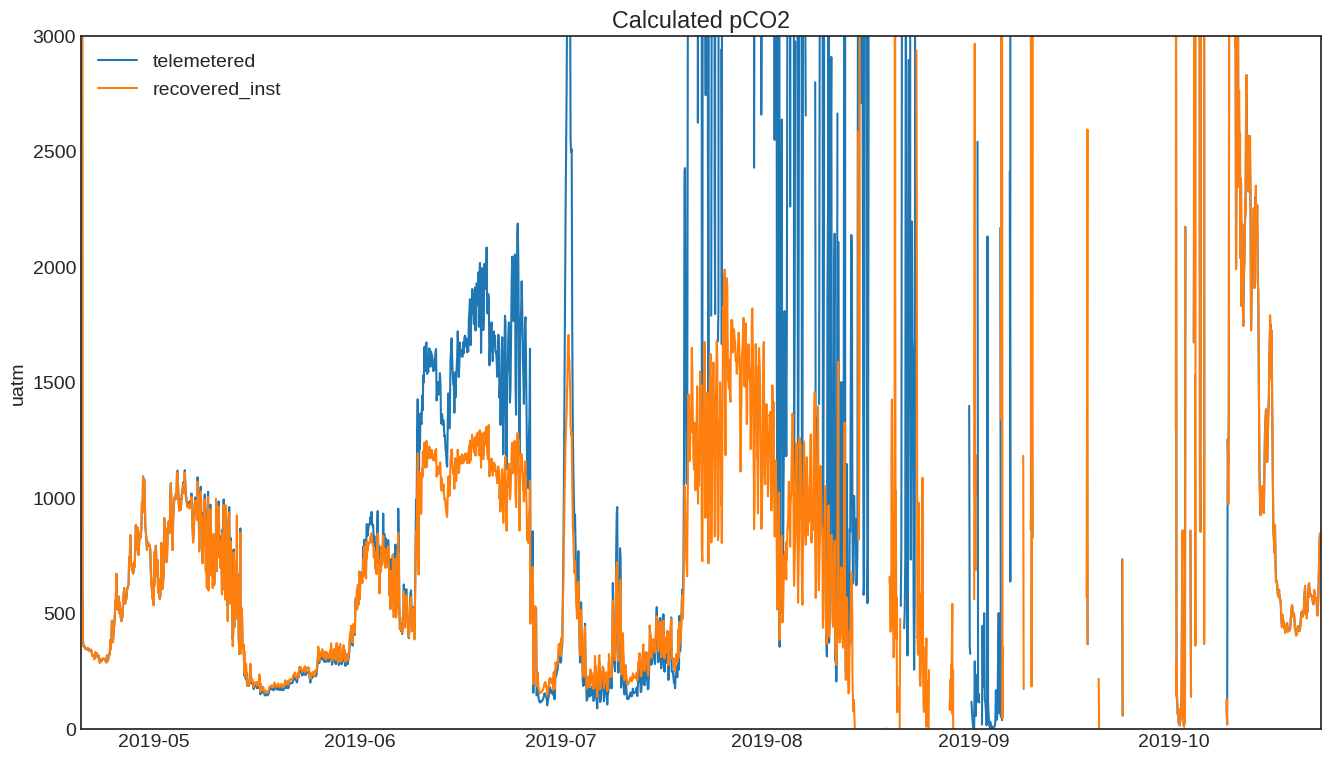

In [6]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.pco2_seawater, label='telemetered')
plt.plot(rinst.time, rinst.pco2_seawater, label='recovered_inst')
plt.title('Calculated pCO2')
plt.ylabel('uatm')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 3000)
plt.legend()
plt.show()

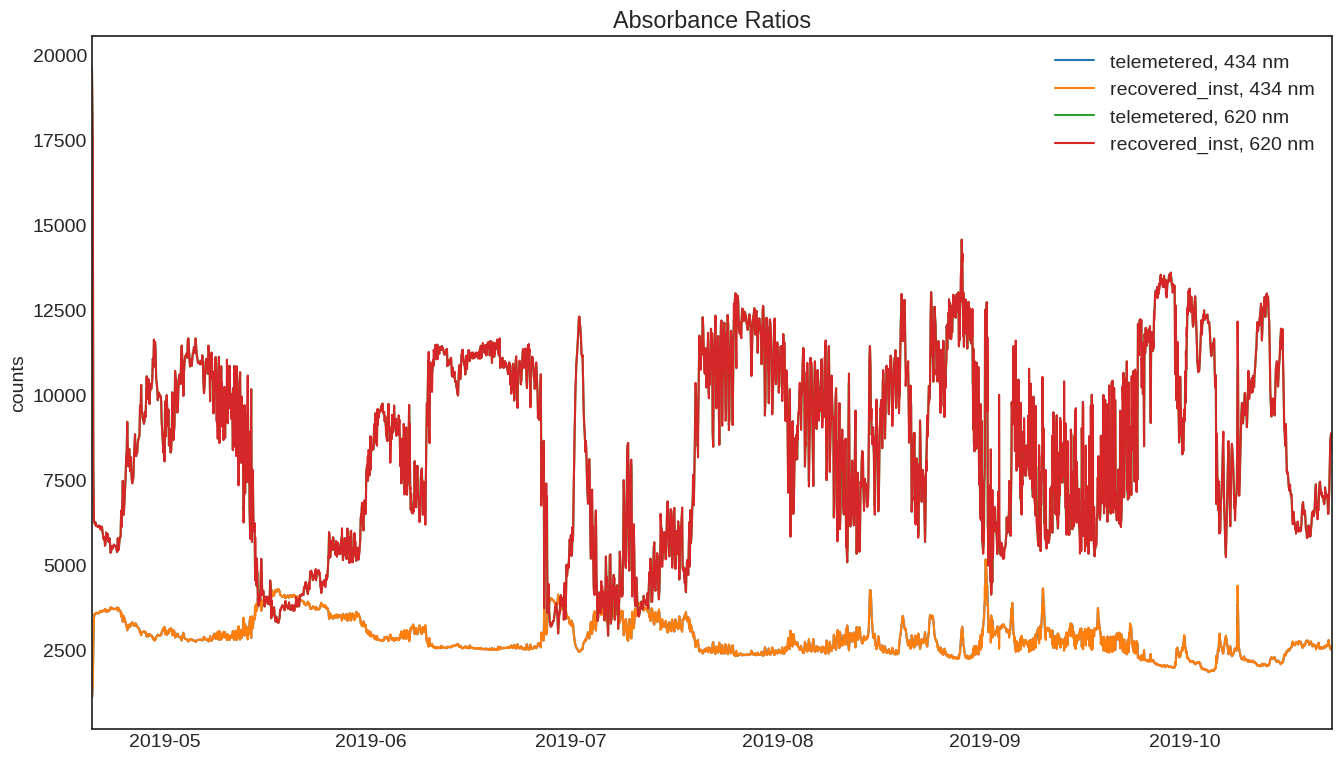

In [7]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_ratio_434, label='telemetered, 434 nm')
plt.plot(rinst.time, rinst.absorbance_ratio_434, label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_ratio_620, label='telemetered, 620 nm')
plt.plot(rinst.time, rinst.absorbance_ratio_620, label='recovered_inst, 620 nm')
plt.title('Absorbance Ratios')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.legend()
plt.show()

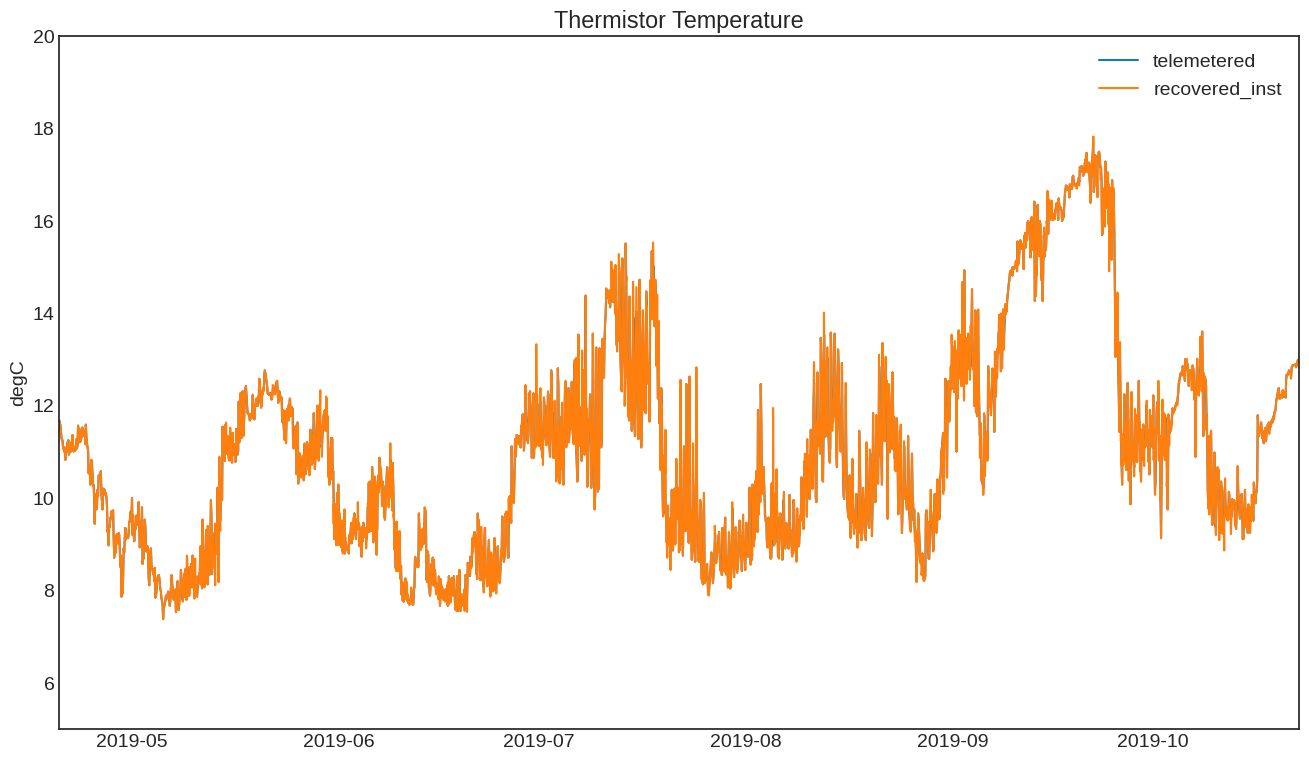

In [8]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.thermistor_temperature, label='telemetered')
plt.plot(rinst.time, rinst.thermistor_temperature, label='recovered_inst')
plt.title('Thermistor Temperature')
plt.ylabel('degC')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(5, 20)
plt.legend()
plt.show()

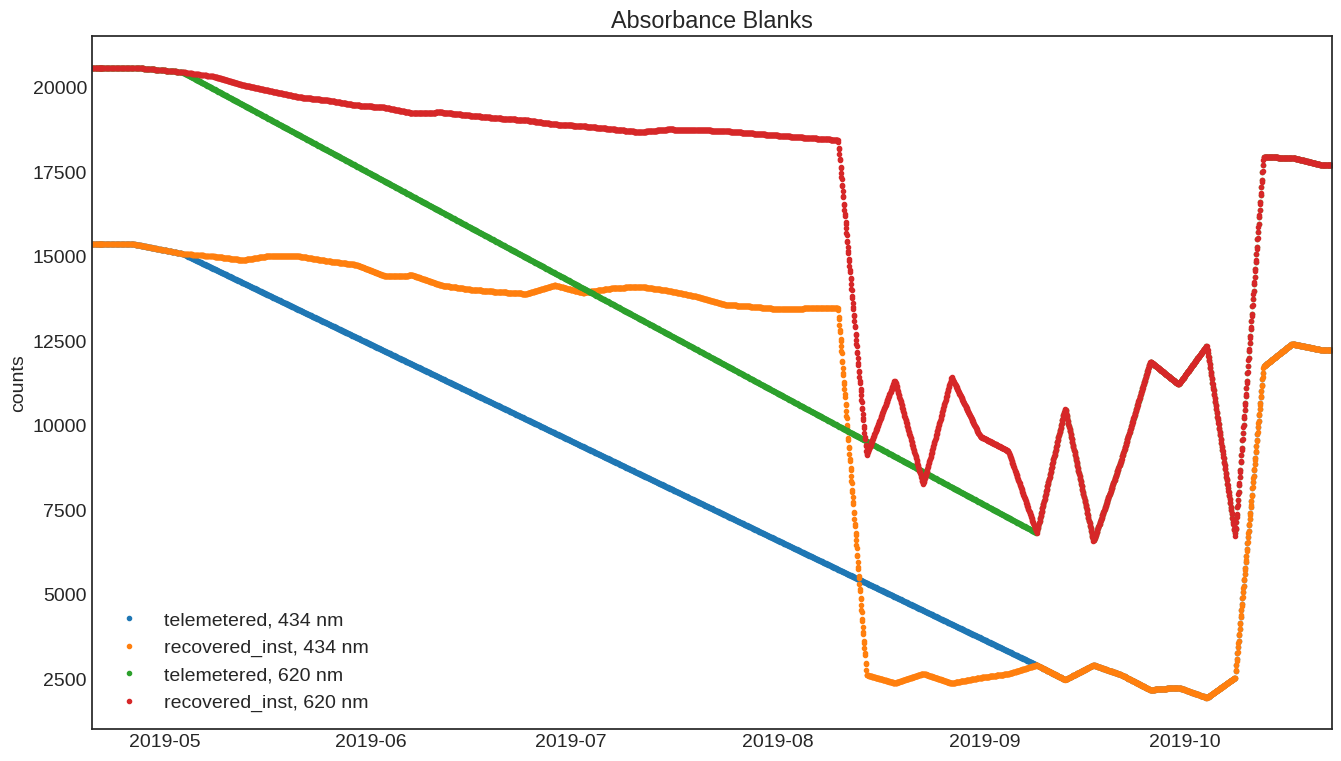

In [9]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_blank_434, '.', label='telemetered, 434 nm')
plt.plot(rinst.time, rinst.absorbance_blank_434, '.', label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_blank_620, '.', label='telemetered, 620 nm')
plt.plot(rinst.time, rinst.absorbance_blank_620, '.', label='recovered_inst, 620 nm')
plt.title('Absorbance Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.legend()
plt.show()

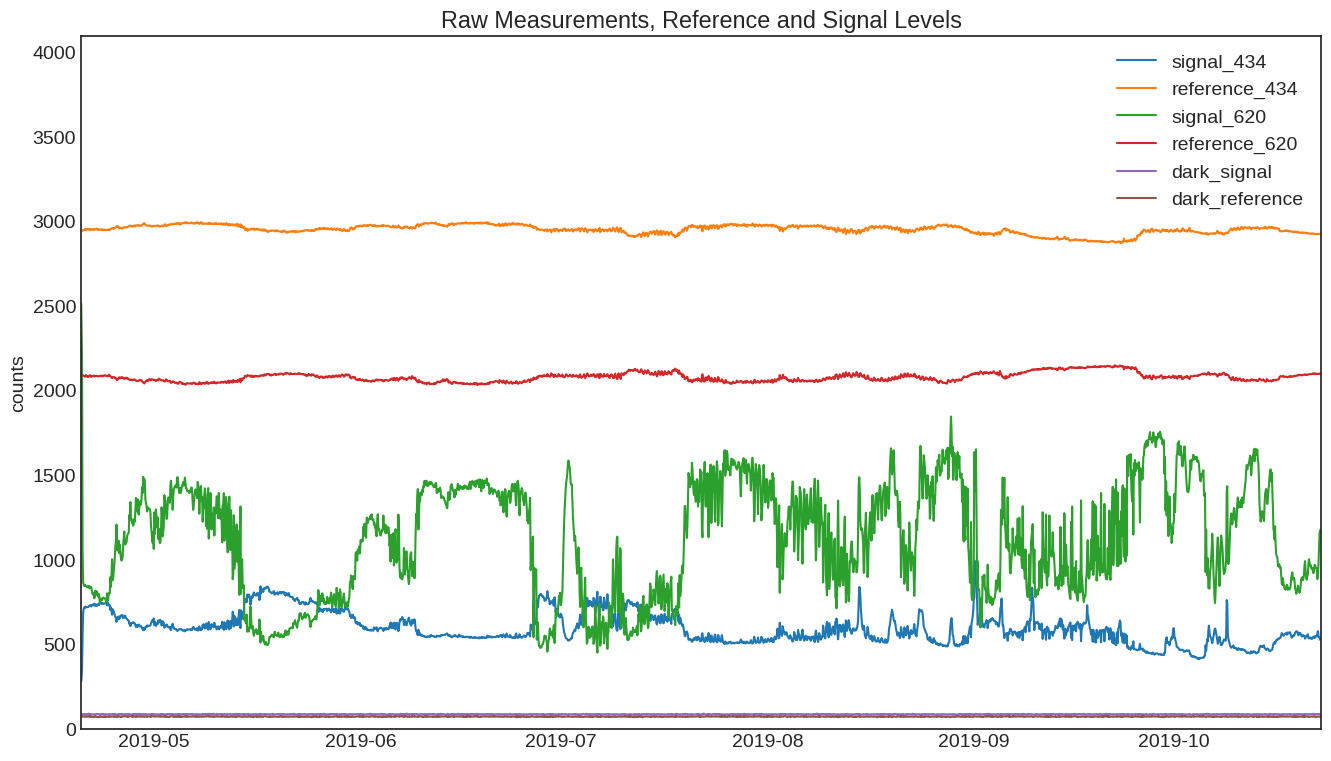

In [10]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.signal_434[:, 0] , label='signal_434')
plt.plot(telem.time, telem.reference_434[:, 0], label='reference_434')
plt.plot(telem.time, telem.signal_620[:, 0], label='signal_620')
plt.plot(telem.time, telem.reference_620[:, 0], label='reference_620')
plt.plot(telem.time, telem.dark_signal[:, 0], label='dark_signal')
plt.plot(telem.time, telem.dark_reference[:, 0], label='dark_reference')
plt.title('Raw Measurements, Reference and Signal Levels')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 4096)
plt.legend()
plt.show()

In [11]:
r = m2m_request(site, node, sensor, 'recovered_inst', 'pco2w_abc_instrument_blank', start, stop)
blanks = m2m_collect(r, '.*deployment0011.*PCO2W.*nc$')
blanks

Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: recovered_inst
	stream: pco2w_abc_instrument_blank
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 400/400 [00:30<00:00, 13.31it/s]


Merging the data files into a single dataset


<xarray.Dataset> Size: 5kB
Dimensions:                                   (time: 42, spectrum: 14)
Coordinates:
  * spectrum                                  (spectrum) int32 56B 0 1 ... 12 13
  * time                                      (time) datetime64[ns] 336B 2019...
Data variables: (12/13)
    pco2w_thermistor_temperature_qc_executed  (time) uint8 42B 1 1 1 1 ... 1 1 1
    blank_light_measurements                  (time, spectrum) int32 2kB 74 ....
    absorbance_blank_620                      (time) int32 168B 20591 ... 17719
    record_type                               (time) uint8 42B 5 5 5 5 ... 5 5 5
    voltage_battery                           (time) int16 84B 3136 ... 3133
    pco2w_thermistor_temperature_qc_results   (time) uint8 42B 1 1 1 1 ... 1 1 1
    ...                                        ...
    internal_timestamp                        (time) datetime64[ns] 336B 2019...
    absorbance_blank_434                      (time) int32 168B 15363 ... 12245
    deployment                                (time) int32 168B 11 11 ... 11 11
    pco2w_thermistor_temperature              (time) float64 336B 10.02 ... 12.7
    record_time                               (time) uint32 168B 3639126969 ....
    thermistor_raw                            (time) int16 84B 2121 ... 2002
Attributes: (12/69)
    node:                               RID16
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_inst
    stream:                             pco2w_abc_instrument_blank
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                44.65683
    lon:                                -124.09533

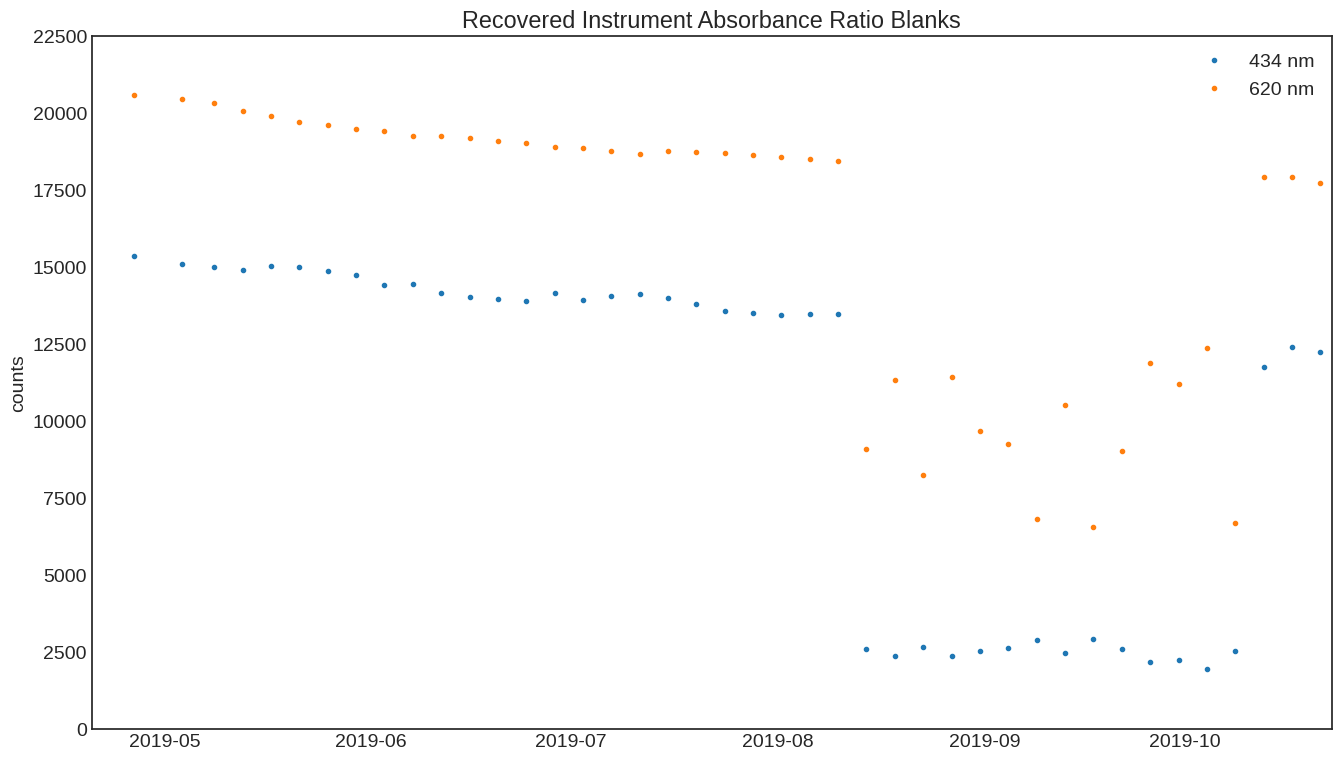

In [12]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(blanks.time, blanks.absorbance_blank_434, '.', label='434 nm')
plt.plot(blanks.time, blanks.absorbance_blank_620, '.', label='620 nm')
plt.title('Recovered Instrument Absorbance Ratio Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 22500)
plt.legend()
plt.show()

In [13]:
clean = blanks.where(blanks.absorbance_blank_434 > 10000, drop=True)

In [14]:
blanks_434 = clean['absorbance_blank_434'].reindex(time=telem['time'], method='ffill')
blanks_434 = blanks_434.bfill(dim='time')
telem['absorbance_blank_434'] = blanks_434

blanks_620 = clean['absorbance_blank_620'].reindex(time=telem['time'], method='ffill')
blanks_620 = blanks_620.bfill(dim='time')
telem['absorbance_blank_620'] = blanks_620

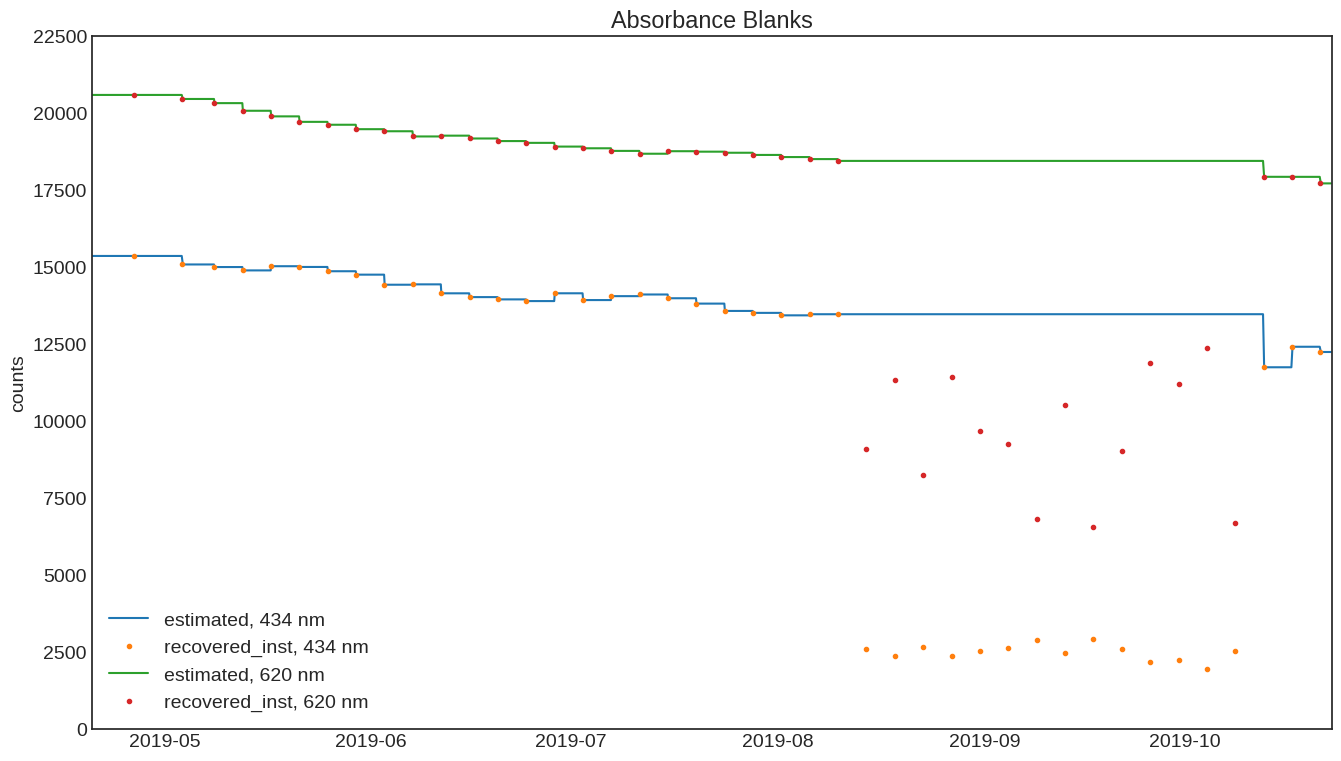

In [15]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_blank_434, label='estimated, 434 nm')
plt.plot(blanks.time, blanks.absorbance_blank_434, '.', label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_blank_620, label='estimated, 620 nm')
plt.plot(blanks.time, blanks.absorbance_blank_620, '.', label='recovered_inst, 620 nm')
plt.title('Absorbance Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 22500)
plt.legend()
plt.show()

In [16]:
from pyseas.data.co2_functions import co2_pco2wat

In [17]:
cala = 0.0747
calb = 0.3956
calc = -1.1472
calt = 15.8
k434 = 1.0602
k620 = 1.3553

In [18]:
telem['pco2_seawater'] = co2_pco2wat(telem.absorbance_ratio_434, telem.absorbance_ratio_620, 
                                     telem.thermistor_temperature, calt, cala, calb, calc, 
                                     telem.absorbance_blank_434 / 16834., telem.absorbance_blank_620 / 16834.)

In [19]:
import pandas as pd
import datetime
vendor = pd.read_csv('ce01issm_pco2w_C0119_converted_2019-10-31.csv')
vendor.index = pd.to_datetime(vendor['Date']) - datetime.timedelta(days=1)

In [20]:
rinst = rinst.where(rinst.absorbance_blank_434 > 10000, drop=True)

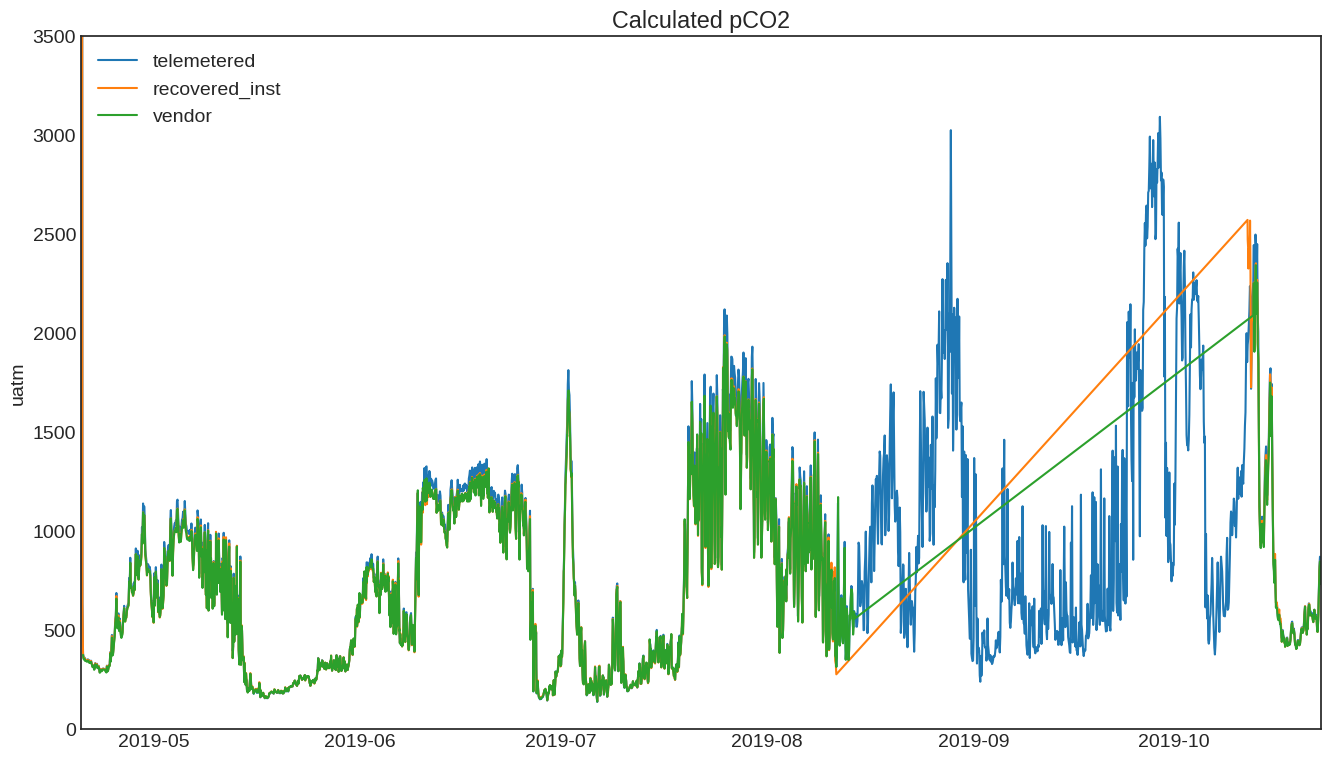

In [21]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.pco2_seawater, label='telemetered')
plt.plot(rinst.time, rinst.pco2_seawater, label='recovered_inst')
plt.plot(vendor.index, vendor['CO2'], label='vendor')
plt.title('Calculated pCO2')
plt.ylabel('uatm')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 3500)
plt.legend()
plt.show()